In [1]:
from utility import *
from sklearn.cluster import MeanShift

In [2]:
pca_2 = pd.read_parquet('dataset/PCA_2.parquet')
y = pd.read_parquet('dataset/y.parquet').squeeze()

In [3]:
estimator=MeanShift(n_jobs=-1)

In [4]:
#np.arange(0.1,5,0.1)
result,estimator=hyperparameter_tuning(estimator,'bandwidth', np.arange(0.1,5,0.1) ,pca_2,y)

  0%|          | 0/49 [00:00<?, ?it/s]

In [ ]:
result

,bandwidth,rand index
0,0.1,0.899650
1,0.2,0.899275
2,0.3,0.899073
3,0.4,0.898468
4,0.5,0.897838
5,0.6,0.893956
6,0.7,0.891465
7,0.8,0.889299
8,0.9,0.883730
9,1.0,0.866104


In [ ]:
result[result["rand index"]==result["rand index"].max()]

,bandwidth,rand index
0,0.1,0.89965


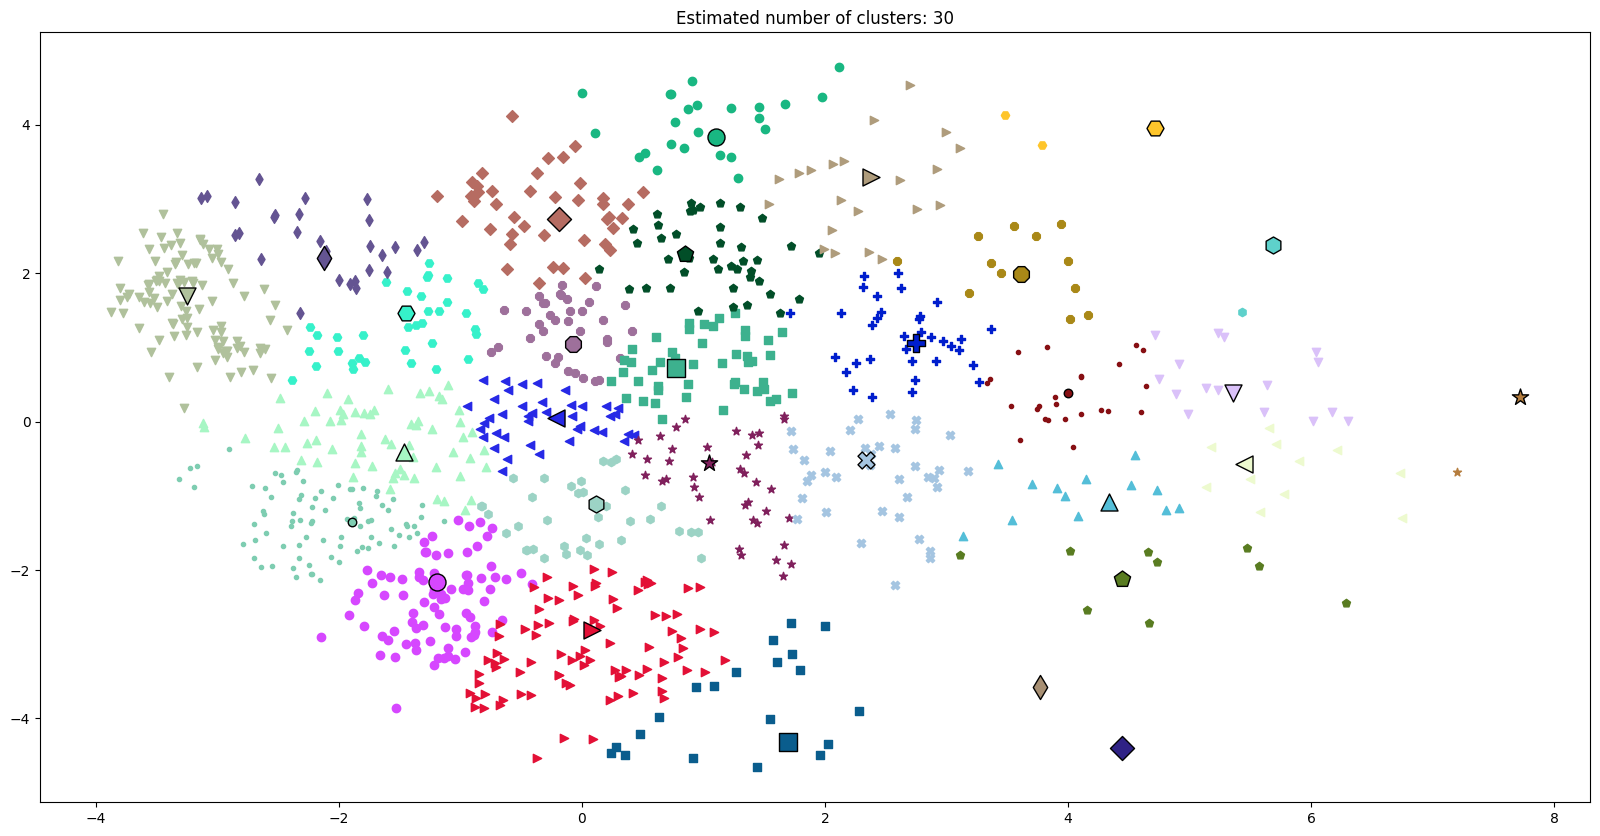

In [ ]:
labels = estimator.labels_
cluster_centers = estimator.cluster_centers_

plot_clustering(pca_2,labels,cluster_centers)